## Homework 2
### Due: Thursday Feb. 13

**Integer vs floating point number**

Write a program to calculate and print the factorial of a
number.  If you wish you can base your program on the
user-defined function for factorial given in Section 2.6, but write your
program so that it calculates the factorial using *integer*
variables, not floating-point ones.  Use your program to calculate the
factorial of 200.

Now modify your program to use floating-point variables instead and again
calculate the factorial of 200.  What do you find?  Explain.

(20 points)

In [1]:
def fact(n):
    value = 1
    for i in range(1,n+1):
        value *= i
    return value


def fact(n):
    value = 1
    while n >= 1.0:
        value *= n
        n = n-1
    return value
print(fact(4.5))

59.0625


**A Simple Derivative**

Suppose we have a function $f(x)$ and we want to
calculate its derivative at a point $x$.  We can do that with pencil and
paper if we know the mathematical form of the function, or we can do it on
the computer by making use of the definition of the derivative:


${d f\over d x} = \lim_{\delta\to0} {f(x+\delta)-f(x)\over\delta}.$


On the computer we can't actually take the limit as $\delta$ goes to
zero, but we can get a reasonable approximation just by making $\delta$
small.
- Write a program that defines a function *f(x)* returning the
  value $x(x-1)$, then calculates the derivative of the function at the
  point $x=1$ using the formula above with $\delta=10^{-2}$.  Calculate
  the true value of the same derivative analytically and compare with the
  answer your program gives.  The two will not agree perfectly.  Why not?
- Repeat the calculation for $\delta=10^{-4}$, $10^{-6}$, $10^{-8}$,
  $10^{-10}$, $10^{-12}$, and $10^{-14}$.  You should see that the accuracy
  of the calculation initially gets better as $\delta$ gets smaller, but
  then gets worse again.  Why is this?

(20 points)

In [ ]:
import matplotlib.pyplot as plt
def func(x):
    return x*(x-1)

def forward_diff(x,n):
    return [n,(func(x+n)-func(x))/n]

print(f'Forward {forward_diff(1,0.01)[1]} with step size {0.01}')
print(f'Forward {forward_diff(1,0.0001)[1]} with step size {1e-4}')
print(f'Forward {forward_diff(1,1e-6)[1]} with step size {1e-6}')
print(f'Forward {forward_diff(1,1e-8)[1]} with step size {1e-8}')
print(f'Forward {forward_diff(1,1e-10)[1]} with step size {1e-10}')
print(f'Forward {forward_diff(1,1e-12)[1]} with step size {1e-12}')
print(f'Forward {forward_diff(1,1e-14)[1]} with step size {1e-14}')


TypeError: 'float' object cannot be interpreted as an integer

So this makes sense, and intuition tells me this is much like 'overfitting'. As we approach closer and closer to our point, we start working with veryyy precise numbers, which computers will struggle with. Notice that it gets worse around 0.0000000001 and 0.000000000001, so, in our function we would have 1.0000000001*(0.0000000001), which due to floating point precision, will struggle to correct data. This is shown more with the next value, where we actually get below 1, which doesn't make mathematical sense.

### Simpson's Rule

- Write a program to calculate an approximate value for the integral $\int_{0}^{2} ( x^4 - 2x + 1)dx$ from Example 5.1 in the book, but using Simpson's rule with 10 slices instead of the trapezoid rule. You may be able to modify your code from the trapezoid rule to complete this task. Compare your result to the known correct value of 4.4. What is the fractional error on your calculation?

- Copy your code and modify it to use one hundred slices, then one thousand. Note the improvement in the result and compare to the results from the trapezoid rule.

(30 points)

In [22]:
import numpy as np

def polynomial(x):
    return (x**4 - 2*x + 1) 

def simpsons(func, start, stop, N_step):
    time_step = (stop-start)/N_step
    integrand_value = 0
    start_value = ((func(start)))
    end_value = ((func(stop)))
    list_of_y_vals = []
    for i in range(N_step):
        if i != N_step-1:
            step_x_value = start + i*time_step
            incrementing = func(step_x_value)
            integrand_value += incrementing
        list_of_y_vals.append(incrementing)
    list_of_y_vals = np.array(list_of_y_vals)
    odd_vals = list_of_y_vals[0::2]
    even_vals = list_of_y_vals[1::2]
    return (1/3)*time_step*(start_value+end_value+(4*sum(odd_vals))+(2*sum(even_vals)))

print(f'Simpsons Rule for a step size of 10 for our function is equal to {simpsons(polynomial,0,2,10)}')
print(f'Simpsons Rule for a step size of 100 for our function is equal to {simpsons(polynomial,0,2,100)}')
print(f'Simpsons Rule for a step size of 1000 for our function is equal to {simpsons(polynomial,0,2,1000)}')
print(f'Not bad, compared to trapezoid it approaches the correct answer quicker, and is more accuarate at the same step size.')



Simpsons Rule for a step size of 10 for our function is equal to 3.4734933333333338
Simpsons Rule for a step size of 100 for our function is equal to 4.327844661333334
Simpsons Rule for a step size of 1000 for our function is equal to 4.393275050063254
Not bad, compared to trapezoid it approaches the correct answer quicker, and is more accuarate at the same step size.


### An Integral With No Analytic Solution

Consider the integral

$$ E(x) = \int_{0}^{x} \exp{-t^2} dt$$

- Write a program to calculate $E(x)$ for values of x from 0 to 3 in steps of 0.1. Choose for yourself what method you will use for performing the integral and a suitable number of slices.

- When you are convinced your program is working, extend it further to make a graph of E(x) as a function of x.

(30 points)

Value of our energy as we approach infinity and negative infinity, a well known value of a gaussian 1.772453850905511

Set of x_values we will be using as bounds [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]
Energy values spanning our defined x values [0.         0.09973466 0.19750099 0.29144651 0.37993927 0.4616513
 0.53561414 0.60124293 0.65832952 0.70700838 0.74770187 0.78105249
 0.8078504  0.82896344 0.84527537 0.85763605 0.86682532 0.87353038
 0.87833537 0.88172066 0.88406933 0.88567805 0.88677031 0.88751001
 0.88801427 0.8883647  0.88861676 0.88880728 0.88896009 0.88909029]


Text(0.5, 1.0, 'Energy(x) over x')

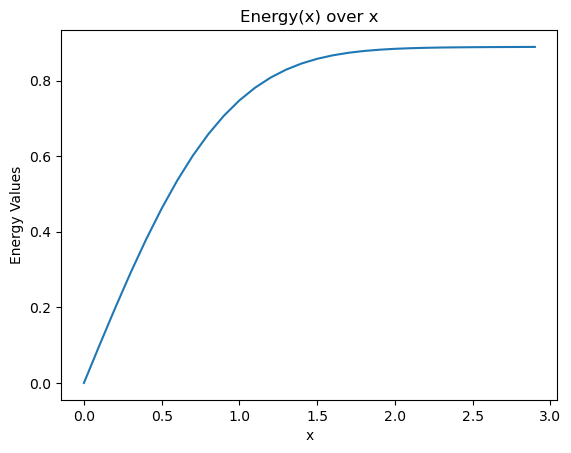

In [43]:
import numpy as np
#I'm using Simpson's here because it is much simplier to use, as well as it is objectively better then the trapezoid rule
def exponential(x):
    return np.exp(-(x**2))

def simpsons(func, start, stop, N_step):
    time_step = (stop-start)/N_step
    integrand_value = 0
    start_value = ((func(start)))
    end_value = ((func(stop)))
    list_of_y_vals = []
    for i in range(N_step):
        if i != N_step-1:
            step_x_value = start + i*time_step
            incrementing = func(step_x_value)
            integrand_value += incrementing
        list_of_y_vals.append(incrementing)
    list_of_y_vals = np.array(list_of_y_vals)
    odd_vals = list_of_y_vals[0::2]
    even_vals = list_of_y_vals[1::2]
    return (1/3)*time_step*(start_value+end_value+(4*sum(odd_vals))+(2*sum(even_vals)))

print(f'Value of our energy as we approach infinity and negative infinity, a well known value of a gaussian {simpsons(exponential,-1000,1000,10000)}')
print('')
x_values = np.arange(0, 3, 0.1)
Energy = np.array([simpsons(exponential,0,i,1000) for i in x])
print(f'Set of x_values we will be using as bounds {x_values}')
print(f'Energy values spanning our defined x values {Energy}')

plt.plot(x_values,Energy)
plt.xlabel('x')
plt.ylabel('Energy Values')
plt.title('Energy(x) over x')